<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
import numpy as np

In [2]:
class Neural_Network(object):
    def __init__(self,inlay, outlay, hidlay):        
        #Define Hyperparameters
        self.inputLayerSize = inlay
        self.outputLayerSize = outlay
        self.hiddenLayerSize = hidlay
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [3]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [4]:
NN = Neural_Network(inlay=3, outlay=1, hidlay=4)
T = trainer(NN)

In [5]:
inputs = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [0,1,0],
                  [1,0,0],
                  [1,1,1],
                  [0,0,0]])

target  = np.array([[0], [1], [1], [1], [1], [0], [0]])

In [6]:
T.train(inputs,target)

Optimization terminated successfully.
         Current function value: 0.500001
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32


In [7]:
print("Predicted Output: \n" + str(NN.forward(inputs))) 
print("Loss: \n" + str(np.mean(np.square(target - NN.forward(inputs))))) # mean sum squared loss

Predicted Output: 
[[1.35562912e-03]
 [1.00000000e+00]
 [9.99515703e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.78977397e-04]]
Loss: 
0.1428574594107322


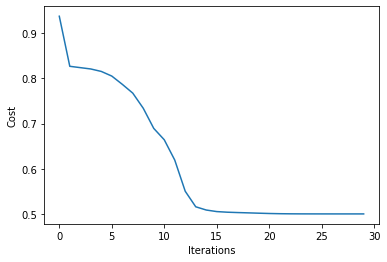

In [9]:
import matplotlib.pyplot as plt
plt.plot(T.J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()     

In [ ]:
0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [10]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [11]:
# input image dimensions
img_rows, img_cols = 28, 28

In [12]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)


x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [15]:
y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [16]:
y_train.shape

(60000,)

In [18]:
y_train[:10]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
import math
from scipy.special import expit
from sklearn.metrics import confusion_matrix, accuracy_score
import random


bias = 1
lear_rate = 0.1
alpha = 0.9

# No. of hidden inputs
n = 100


weight_i2h = np.random.uniform(-0.05,0.05,(784,n))
# print(weight_i2h.shape)

weight_h20 = np.random.uniform(-0.05,0.05,(n+1,10))
# print(weight_h20.shape)

# store previous delta wt from hidden to output layer
prev_wt_h20 = np.zeros((n+1,10))

# store previous delta wt from input to hidden layer
prev_wt_i2h = np.zeros((784,n))


# matrix to store the activation h1...hk 
hl_input = np.zeros((1,n+1))
hl_input[0,0] = 1


# print(hl_input.shape)






def multi_perceptron(epoch,input_ds,set_flag):
    global weight_i2h,weight_h20,prev_wt_i2h,prev_wt_h20
    pred_list = []
    actual_list = []
    for i in range(input_ds.shape[0]):
        target_class = input_ds[i,0].astype('int')
        actual_list.append(target_class)    
        xi = input_ds[i].astype('float16')/255
        xi[0] = bias            ## Set the value of x0 to bias unit = 1
        xi = xi.reshape(1,784)

        z_hl = np.dot(xi,weight_i2h)
        sig_hl = expit(z_hl)
        # print("sig_hl",sig_hl.shape)
        hl_input[0,1:] = sig_hl
        # print("hl_input",hl_input)
        # print(hl_input.shape)
        z_ol = np.dot(hl_input,weight_h20)
        sig_ol = expit(z_ol)
        # print(sig_ol)
        predict = np.argmax(sig_ol)
        # print(predict)
        pred_list.append(predict)
        # print(type(sig_ol))
        # print(sig_ol.shape)


        if epoch>0 and set_flag == 1:
            # print("inside wt updation",epoch)
            ###### Calculating error term #######

            ##error term for output unit 
            tk = np.zeros((1,10))+0.1
            tk[0,target_class] = 0.9
            # print(tk)
            error_ol = sig_ol*(1-sig_ol)* (tk - sig_ol)
            # print("error_ol shape for ",epoch," ",error_ol.shape)
            ##error term for hidden unit
            error_hl = sig_hl*(1-sig_hl)*np.dot(error_ol,weight_h20[1:,:].T) 
            # print(delta_hl.shape)
            # print("error_hl shape for ",epoch," ",error_hl.shape)
            ####### Update weights ##########

            ### Hidden to output layer wt updation

            delta_weight_h20 = (lear_rate * error_ol * hl_input.T) + (alpha * prev_wt_h20)
            prev_wt_h20 = delta_weight_h20
            # print("delta_weight_h20.shape after wt updation", delta_weight_h20.shape)
            weight_h20 = weight_h20 + delta_weight_h20

            ### Input to output layer wt updation    

            delta_weight_i2h = (lear_rate * error_hl * xi.T) + (alpha * prev_wt_i2h) 
            prev_wt_i2h = delta_weight_i2h
            # print("delta_weight_i2h.shape after wt updation", delta_weight_i2h.shape)
            weight_i2h = weight_i2h + delta_weight_i2h



    accur = (np.array(pred_list) == np.array(actual_list)).sum()/float(len(actual_list))*100

    print("len of actual_list after ", epoch," is ",len(actual_list))
    print("len of pred_list after ", epoch," is ",len(pred_list))

    if(set_flag == 0):
        print("Confusion matrix for epoch ",epoch)
        print(confusion_matrix(actual_list,pred_list))  
    return accur




In [ ]:
for each in range(50):
    trn_accuracy = multi_perceptron(each,x_train,1)
    #tst_accuracy = multi_perceptron(each,y_test,0)

#### different perceptron

In [19]:
def create_weights(data):
    a, b = np.shape(data)
    weights = np.random.rand(b,1)
    return weights

weights = create_weights(x_train)

In [20]:
def predict(data_point, weights):
    b = np.dot(data_point, weights)
    a = b>0
    return a*1

In [21]:
def update(weights, data_point, labels, alpha=.1):
    predicted = predict(data_point, weights)
    weight_temp = np.zeros(np.shape(weights))
    weight_temp[:,0] = alpha*(labels-predicted)*data_point
    return weight_temp+weights

In [22]:
def train_perceptron(data, labels, weights, alpha = .001, iterations = 10):
    for j in range(0, iterations):
        for i in range(0, len(data)):
            weights = update(weights, data[i], labels[i], alpha)
    return weights

In [26]:
train_perceptron(x_train, y_train, weights)

array([[ 2.79790068e-01],
       [ 1.47280882e-01],
       [ 6.45221193e-01],
       [ 7.13058562e-01],
       [ 2.25713404e-01],
       [ 1.77389394e-01],
       [ 4.88582152e-01],
       [ 9.64955796e-01],
       [ 2.22361233e-01],
       [ 1.04998056e-01],
       [ 3.57841068e-01],
       [ 2.00819391e-01],
       [ 1.66934493e-01],
       [ 8.78911684e-01],
       [ 6.62857682e-01],
       [ 6.76800810e-01],
       [ 5.55685193e-01],
       [ 3.52641035e-01],
       [ 9.65801233e-01],
       [ 9.18248821e-01],
       [ 3.60799118e-01],
       [ 2.64910275e-01],
       [ 2.03230421e-01],
       [ 2.51221211e-01],
       [ 9.64785226e-01],
       [ 1.42263073e-01],
       [ 3.91353444e-02],
       [ 3.01226621e-01],
       [ 3.46306260e-01],
       [ 4.26384025e-01],
       [ 6.14352935e-01],
       [ 5.11649522e-01],
       [ 1.93944864e-01],
       [ 2.61314248e-01],
       [ 3.51310674e-01],
       [ 9.40573807e-01],
       [ 7.21817532e-01],
       [ 6.73920478e-01],
       [ 7.4

In [24]:
def test_perceptron_f(data, labels, weights):
    a,b = np.shape(data)
    predicted = predict(data, weights)
    correct = (predicted==labels)*1
    true_pos = np.sum((labels==1)*(correct))
    true_neg = np.sum((labels==0)*(correct))
    tp_p = true_pos/float(np.sum(labels))
    print(np.sum(labels))
    tn_p = true_neg/float(a- np.sum(labels))
    return true_pos, true_neg, tp_p, tn_p, a

In [27]:
test_perceptron_f(x_test, y_test, weights)

980.0


(9800000, 0, 10000.0, 0.0, 10000)

In [33]:
def one_number(labels, number):
    return (labels == number)*1

In [28]:
def all_numbers(data,labels):
    c,d = np.shape(data)
    w = create_weights(data)
    weights = []
    for i in range(0, 10):
        z = one_number(labels, i)
        a = train_perceptron(data, z, w, .001, 4)
        weights.append(a[:,0])
    return np.asarray(weights)

In [29]:
def one_all(data, weights):
    a = np.dot(data,np.transpose(weights))
    b = len(np.shape(data))
    if b == 1:
        return np.argmax(a)
    return np.argmax(a, axis=1)

In [30]:
def test_all(data, labels, weights):
    a, b = np.shape(labels)
    predicted = one_all(data, weights)
    correct = predicted == labels[:,0]
    accuracy = np.sum(correct)/float(a)
    return accuracy

In [34]:
all_numbers(x_train, y_train)

array([[0.7464715 , 0.39716893, 0.371977  , ..., 0.6015871 , 0.20134565,
        0.57255632],
       [0.7464715 , 0.39716893, 0.371977  , ..., 0.6015871 , 0.20134565,
        0.57255632],
       [0.7464715 , 0.39716893, 0.371977  , ..., 0.6015871 , 0.20134565,
        0.57255632],
       ...,
       [0.7464715 , 0.39716893, 0.371977  , ..., 0.6015871 , 0.20134565,
        0.57255632],
       [0.7464715 , 0.39716893, 0.371977  , ..., 0.6015871 , 0.20134565,
        0.57255632],
       [0.7464715 , 0.39716893, 0.371977  , ..., 0.6015871 , 0.20134565,
        0.57255632]])

In [35]:
test_all(x_test, y_test, weights)

ValueError: not enough values to unpack (expected 2, got 1)

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?

In [60]:
y_test = y_test.reshape(1,-1)

In [61]:
y_test[1,0]

IndexError: index 1 is out of bounds for axis 0 with size 1